<a href="https://colab.research.google.com/github/gowthami-08/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


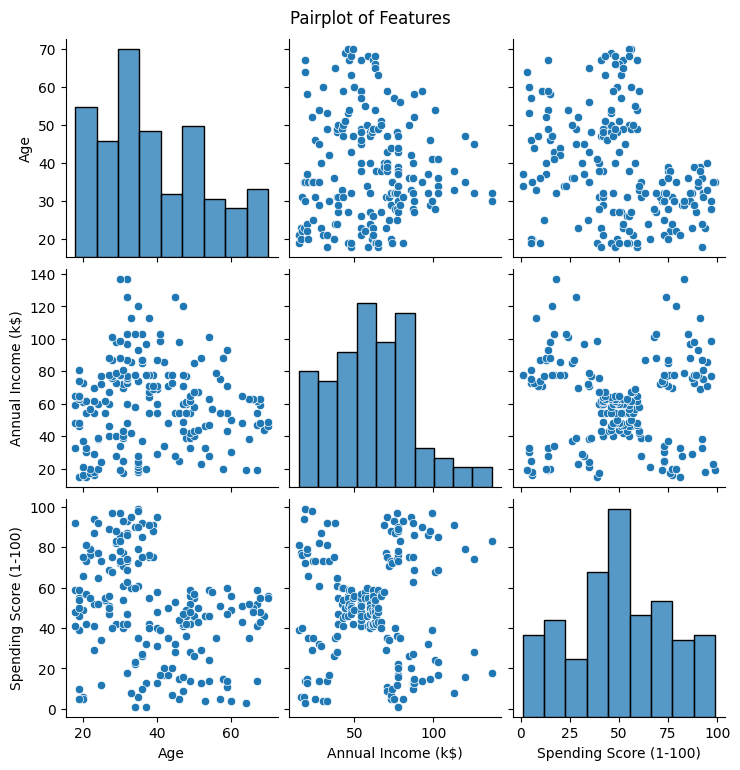

In [1]:
# kmeans_step1_load_visualize.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = '/content/Mall_Customers.csv'
df = pd.read_csv('/content/Mall_Customers.csv')

# Display first few rows
print(df.head())

# Basic info
print(df.info())

# Pairplot for initial visualization
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


In [2]:
# kmeans_step2_fit_model.py
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans with arbitrary K=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Show results
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


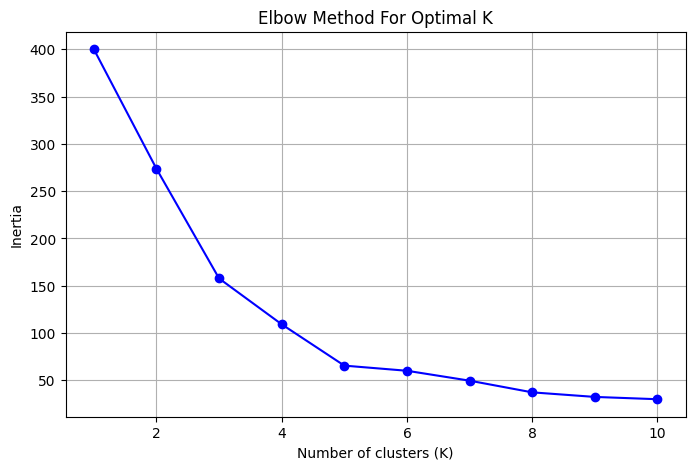

In [3]:
# kmeans_step3_elbow_method.py
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


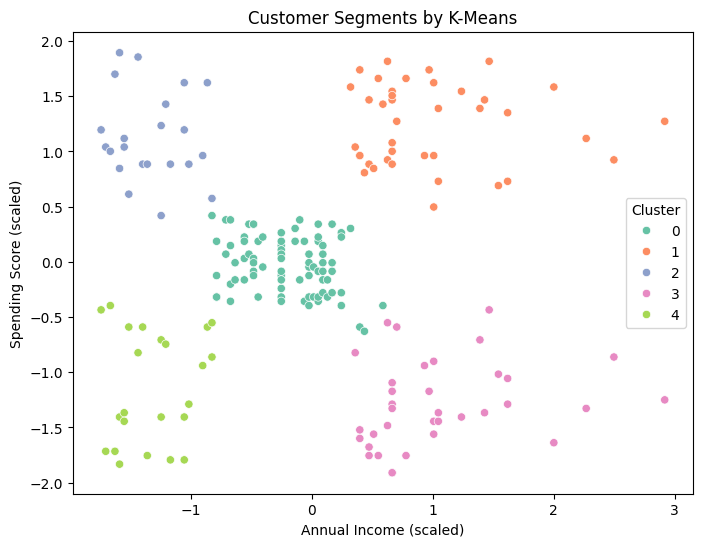

In [4]:
# kmeans_step4_visualize_clusters.py
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


In [5]:
# kmeans_step5_silhouette_score.py
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for K=5: {sil_score:.3f}")


Silhouette Score for K=5: 0.555
